In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Implementation-1 Dataset.zip to Implementation-1 Dataset.zip


In [ ]:
import zipfile
import os

zip_path = "Implementation-1 Dataset.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Folders:", os.listdir("/content/Implementation-1 Dataset"))

Folders: ['Recyclable', 'Organic']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
DATASET_PATH = "/content/Implementation-1 Dataset"

IMG_SIZE = (128, 128)   # smaller → faster
BATCH_SIZE = 64         # faster training
EPOCHS = 8              # enough for baseline

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 1135 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
print("Classes:", train_data.class_indices)
print("Train samples:", train_data.samples)
print("Validation samples:", val_data.samples)

Classes: {'Organic': 0, 'Recyclable': 1}
Train samples: 1135
Validation samples: 200


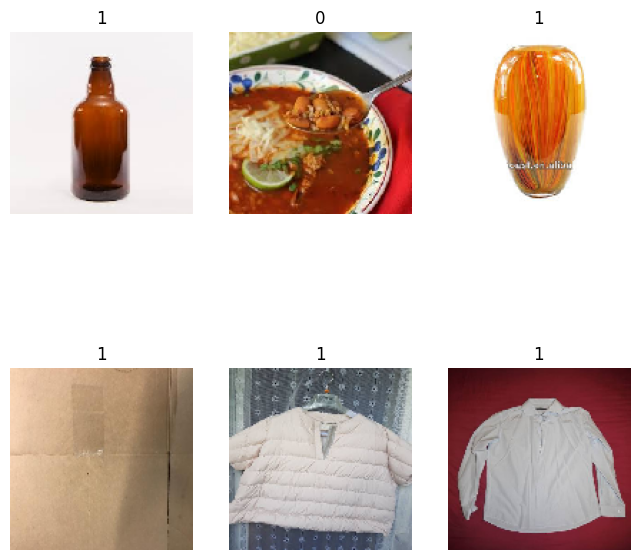

In [ ]:
images, labels = next(train_data)

plt.figure(figsize=(8,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(int(labels[i]))
    plt.axis("off")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826,529 (3.15 MB)

 Trainable params: 826,529 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - accuracy: 0.7618 - loss: 0.6184 - val_accuracy: 0.6450 - val_loss: 0.7487
Epoch 2/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7878 - loss: 0.4516 - val_accuracy: 0.6600 - val_loss: 0.6024
Epoch 3/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8537 - loss: 0.3550 - val_accuracy: 0.7500 - val_loss: 0.5691
Epoch 4/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8450 - loss: 0.3404 - val_accuracy: 0.6900 - val_loss: 0.6262
Epoch 5/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8818 - loss: 0.2736 - val_accuracy: 0.7450 - val_loss: 0.5641
Epoch 6/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8950 - loss: 0.2448 - val_accuracy: 0.7900 - val_loss: 0.5419
Epoch 7/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9271 - loss: 0.1748 - val_accuracy: 0.7950 - val_loss: 0.5189
Epoch 8/8
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9439 - loss: 0.1693 - val_accuracy: 0.7700 - val_lo

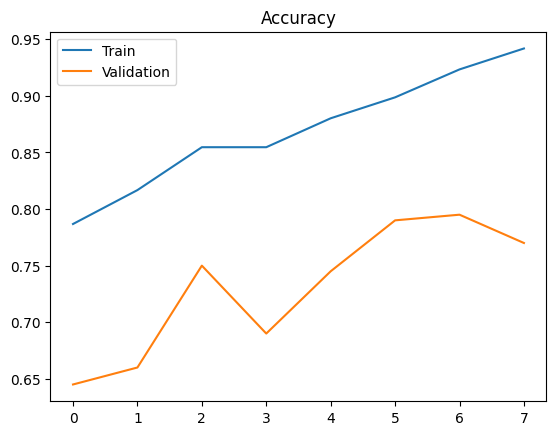

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train", "Validation"])
plt.title("Accuracy")
plt.show()

In [ ]:
loss, acc = model.evaluate(val_data)
print("Validation Accuracy:", acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7893 - loss: 0.5431
Validation Accuracy: 0.7699999809265137


In [ ]:
val_data.reset()

pred = model.predict(val_data)
pred = (pred > 0.5)

print(confusion_matrix(val_data.classes, pred))
print(classification_report(val_data.classes, pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step
[[30 35]
 [59 76]]
              precision    recall  f1-score   support

           0       0.34      0.46      0.39        65
           1       0.68      0.56      0.62       135

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.57      0.53      0.54       200



In [ ]:
model.save("waste_model_implementation_1.h5")

from google.colab import files
files.download("waste_model_implementation_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
!git clone https://github.com/Shakir5665/Mini-project---Waste-Sorting-System.git

fatal: destination path 'Mini-project---Waste-Sorting-System' already exists and is not an empty directory.


In [21]:
!cp "Mini project-Implementation-1.ipynb" Mini-project---Waste-Sorting-System/

cp: cannot stat 'Mini project-Implementation-1.ipynb': No such file or directory
